# **Desafío 1. Análisis exploratorio del dataset de precios de propiedades de Properatti**

# Ponderación de datos

Ponderación de datos:

1.   Superficie: surface_covered_in_m2
2.   Localización: sub_loc
3.   Tipo de propiedad: property_type
4.   Habitaciones????: rooms


Fuentes:
http://www.bibliotecacpa.org.ar/greenstone/collect/salagr/index/assoc/HASH0153.dir/doc.pdf
https://www.infobae.com/economia/2020/02/15/claves-para-entender-como-se-realiza-una-correcta-tasacion-a-la-hora-de-vender-una-vivienda/

# Inicio

Importamos la bibliotecas 

In [235]:
# !pip install geopandas


In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely 
import descartes 
import pyproj 
import re
import math

In [237]:
%matplotlib inline

In [238]:
# from google.colab import drive
# drive.mount('/content/drive')

Leemos el dataset que está subido a la nube de Google Drive y creamos el DataFrame

In [239]:
df = pd.read_csv('data\properatti.csv')

#Caracterización del dataset



In [240]:
df.shape

(121220, 26)

In [241]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [242]:
df.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
36517,36517,sell,apartment,Lanús Oeste,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús ...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.6690751,-58.4155464",-34.669075,...,60.0,1416.666667,1416.666667,NaN,3.0,NaN,http://www.properati.com.ar/18h2u_venta_depart...,DEPARTAMENTO DE 3 AMBIENTES EN CONTRAFRENTE DE...,TUYUTI AL 3600. DEPARTAMENTO DE 3 AMBIENTES EN...,https://thumbs4.properati.com/4/6yNTZgRYyLHfJP...
68443,68443,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,NaN,NaN,...,91.0,1789.473684,1868.131868,NaN,NaN,NaN,http://www.properati.com.ar/1aguw_venta_depart...,Semipiso al frente con cochera amplia cubierta...,Semipiso en venta La Plata Dacal Bienes Raices,https://thumbs4.properati.com/7/mcM-e5duyDolHV...
56640,56640,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.578864,-58.495266",-34.578864,...,82.0,NaN,2560.975610,121.0,3.0,NaN,http://www.properati.com.ar/19rit_venta_depart...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,TRES AMBIENTES A ESTRENAR AMENITIES V.URQUIZA,https://thumbs4.properati.com/7/WA8daFv_HrkmQQ...
71270,71270,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,41.0,2872.340426,3292.682927,NaN,NaN,NaN,http://www.properati.com.ar/1akqn_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/3/BW58JcvwlP9znn...
43662,43662,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5787999,-58.4919266",-34.578800,...,32.0,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18yvn_venta_depart...,"excelente, con detalles de categoria",mono ambiente con balcon a estrenar,https://thumbs4.properati.com/3/evLxxAfDq-TzuF...


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

##Evaluamos la densidad de datos de cada columna

In [244]:
df.isna().sum()*100/len(df)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


##Análisis de columnas

In [245]:
df.operation.unique()

array(['sell'], dtype=object)

In [246]:
df.country_name.value_counts()

Argentina    121220
Name: country_name, dtype: int64

In [247]:
df.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [248]:
#dropeamos las columnas innecesarias, o con alto nivel de Nan
df.drop(['Unnamed: 0', 'operation', 'country_name', 'floor', 'expenses', 'properati_url', 'image_thumbnail'], axis=1, inplace=True)

## Búsqueda de independencia entre columnas

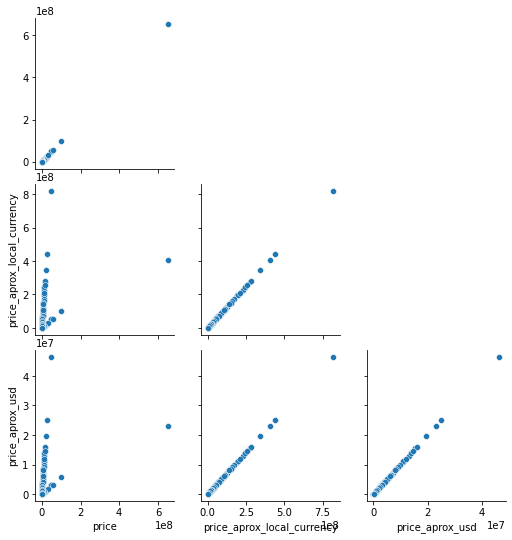

In [249]:
sns.PairGrid(df,vars=['price', 'price_aprox_local_currency', 'price_aprox_usd'],corner=True, dropna=True).map(sns.scatterplot)

In [250]:
# Calculamos los tres tipos coeficiente de correlación entre dos Series
print('Correlación Pearson local currency and USD: ', df['price_aprox_local_currency'].corr(df['price_aprox_usd'], method='pearson'))

Correlación Pearson local currency and USD:  1.0


In [251]:
# Comparamos valor de la fila 105 de las columnas 'price', 'price_aprox_local_currency' y 'price_aprox_usd' para detectar correlación

print(df.iloc[105]['price'])
print(df.iloc[105]['price_aprox_local_currency'])
print(df.iloc[105]['price_aprox_usd'])

1700000.0
29995650.0
1700000.0


<AxesSubplot:xlabel='price_per_m2', ylabel='price_usd_per_m2'>

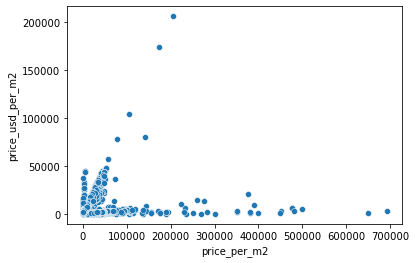

In [252]:
# precio/m2 y precio/m2 en usd
sns.scatterplot( x=df.price_per_m2, y=df.price_usd_per_m2)

In [253]:
# Calculamos los tres tipos coeficiente de correlación entre dos Series
print('Correlación Pearson precio por metro and USD: ', df['price_per_m2'].corr(df['price_usd_per_m2'], method='pearson'))

Correlación Pearson precio por metro and USD:  0.1770823799855066


# Gráficos y eliminación de outliers

In [254]:
def custom_log10(x):
  return math.log10(x) if x != 0 else x


Text(0, 0.5, 'Counts')

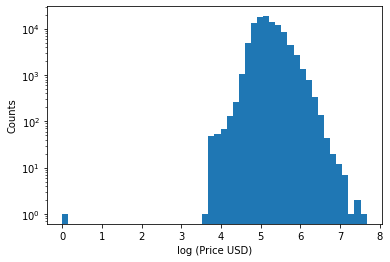

In [255]:
#distribución de precios en usd
plt.hist(x=df.price_aprox_usd.apply(custom_log10), log=True, bins= 50)
plt.xlabel('log (Price USD)')
plt.ylabel('Counts')
#plt.xscale('log')

In [256]:
#eliminamos precios de más de 5.10^6
df.drop(df[df.price_aprox_usd>5e6].index, inplace=True)

Text(0.5, 0, 'log precio m2 en USD')

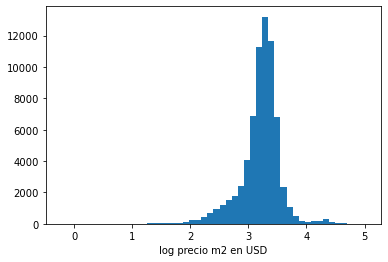

In [257]:
#distribución de precio del m2. Varios outliers, posiblemente todos los de más de 6k/m2
plt.hist(x=(df.price_usd_per_m2.apply(custom_log10)), bins=50)
plt.xlabel("log precio m2 en USD")

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='surface_covered_in_m2'>

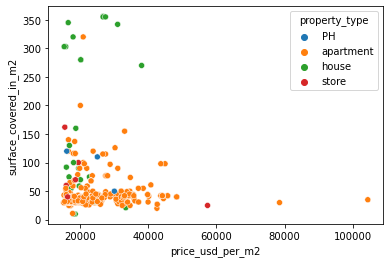

In [258]:
#grafico de las unidades con más de 15k USD/m2
#muchas unidades de poca superficie, altos precios por m2. Algunas unidades outliers en superficie.
sns.scatterplot(x=(df[df.price_usd_per_m2>15000].price_usd_per_m2), y=(df[df.price_usd_per_m2  >15000].surface_covered_in_m2), hue=df.property_type)

In [259]:
#no parecería que los outliers de precio/m2 sean unidades especiales. Deberiamos agregar por barrio
df[df.price_usd_per_m2>15000].property_type.value_counts()

apartment    626
house         33
store          8
PH             3
Name: property_type, dtype: int64

In [260]:
#parecería ser un problema de un cero mas en el input

(df[df.price_usd_per_m2>15000]).groupby('place_name')['price_usd_per_m2'].median()

place_name
Aldo Bonzi                     18500.000000
Alejandro Roca                 24038.461538
Almagro                        20501.515152
Barracas                       29562.500000
Barrio Cerrado "La Delfina"    38000.000000
Barrio Norte                   15833.333333
Belgrano                       20316.666667
Boca                           21186.666667
Boedo                          20100.000000
Caballito                      19449.545455
Capital Federal                18571.428571
Castelar                       16756.756757
Centro / Microcentro           31250.000000
Congreso                       22497.098516
El Palomar                     18000.000000
Escobar                        16428.571429
Ezpeleta                       20219.857143
Flores                         35783.783784
Haedo                          24500.000000
José C Paz                     26315.789474
Mar del Plata                  21073.529412
Mataderos                      16666.666667
Mendoza              

In [261]:
#corregimos aquellos que fueron un error de input dividiendo el precio en usd por su superficie
df['price_usd_per_m2'] = df.apply(lambda x: (x['price_aprox_usd'] / x['surface_covered_in_m2']) if (x['price_usd_per_m2'] > 5000) else x['price_usd_per_m2'], axis =1)

In [262]:
#dividimos por 10 los que permanecen mayores a 15k USD/m2
df.loc[df.price_usd_per_m2>15000,'price_usd_per_m2' ] = df.loc[df.price_usd_per_m2>15000,'price_usd_per_m2']/10

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

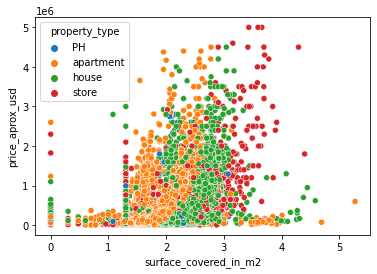

In [263]:
#existen unidades grandes baratas --> probablemente outliers
sns.scatterplot( x=df.surface_covered_in_m2.apply(custom_log10), y=df.price_aprox_usd, hue=df.property_type)
# plt.show()

In [264]:
df[df.price_aprox_usd<5e3]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
9761,house,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,"4.5458426,-75.67893099",4.545843,-75.678931,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,3.0,Casa en Venta de 2 dorm. en Armenia,SE VENDE CASA EN EL BARRIO EL LIMONAR
34666,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-38.416097,-63.616672",-38.416097,-63.616672,80000.0,ARS,82340.17,4666.62,55.0,55.0,84.847636,1454.545455,2.0,PLAN BAUEN PILAY 1 DORMITORIO SIN ADJUDICAR CO...,Departamento venta
59875,store,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-37.9997575,-57.5509063",-37.999758,-57.550906,84900.0,ARS,87383.50,4952.45,60.0,NaN,82.540833,NaN,1.0,Exelente oportunidad. Venta de fondo de comerc...,Local venta


In [265]:
# descartamos unidades de menos de 5000 usd
df.drop(df[df.price_aprox_usd<5e3].index, inplace=True)

Text(0, 0.5, 'Counts')

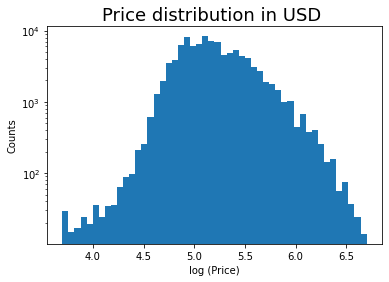

In [266]:
#distribución de precios luego de descartar outliers
plt.hist(x=(df.price_aprox_usd.apply(custom_log10)),log=True, bins=50)
plt.title('Price distribution in USD ', loc = 'center', fontsize = 18)
plt.xlabel('log (Price)')
plt.ylabel('Counts')

Text(0.5, 0, 'log precio m2 en USD')

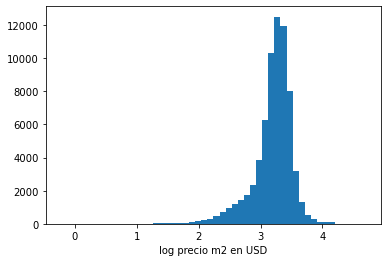

In [267]:
#distribución de precio del m2 luego de descartar outliers
plt.hist(x=(df.price_usd_per_m2.apply(custom_log10)), bins=50)
plt.xlabel("log precio m2 en USD")

Superficie

In [268]:
df[df.surface_covered_in_m2>50000].description
#tiene 187 m2
df.iloc[76012].description

'Departamento 82m² con Agua Corriente en Avenida Santa María De Las Conchas 2040, Tigre, Tigre, por U$S 1'

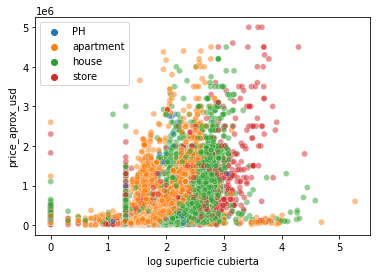

In [269]:
sns.scatterplot( x=df.surface_covered_in_m2.apply(custom_log10), y=df.price_aprox_usd, hue=df.property_type, alpha=0.5)
plt.xlabel("log superficie cubierta")
plt.legend()

In [270]:
#asigno la correcta, pero no se puede hacer de a uno.
df.loc[76012, ('surface_covered_in_m2')] = 187

In [271]:
df[(df.surface_covered_in_m2 > 1000) & (df['property_type'] == 'apartment')][['surface_covered_in_m2', 'place_name','price_usd_per_m2','price_aprox_usd','description']]

,surface_covered_in_m2,place_name,price_usd_per_m2,price_aprox_usd,description
4447,3556.0,Belén de Escobar,NaN,37576.06,Corredor Responsable: Luis Alberto De Blas - C...
7100,5350.0,Caballito,NaN,140000.00,Corredor Responsable: Mónica Silvia Martinuzzi...
7285,10145.0,San Isidro,NaN,250000.00,"MUY BUEN DEPTO EN SAN ISIDROLiving comedor, es..."
13690,1700.0,Villa Carlos Paz,NaN,NaN,"Departamentos de 1,2 y 3 habitaciones.Situado ..."
13699,7500.0,Villa Carlos Paz,NaN,NaN,Departamentos varios en torre Constantino V. U...
14296,1900.0,Mar del Plata,641.360414,201387.17,Tromarco Falucho Un edificio moderno en donde ...
19946,5500.0,Villa Carlos Paz,NaN,NaN,PARA DESARROLLISTAS¡¡¡INTERESANTE PROYECTO APR...
20881,1620.0,Córdoba,NaN,85000.00,OPORTUNIDAD DE INVERTIR A CORTO PLAZO EN UNA Z...
22195,1200.0,Salta,NaN,NaN,"La Trinidad, ubicada en el corazón de San Lore..."
24013,9435.0,Pinamar,NaN,110000.00,Corredor Responsable: Daniel Aibe - CMCPD 1155...


In [272]:
#muchas store. Hay que eliminar o corregir los deptos y las casas. 
#Las store parecen en subasta. No se que relevancia van a tener a la hora de hacer una regresion para tasar.

df[df.surface_covered_in_m2>20000]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
35151,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-37.9898094428,-57.5477728296",-37.989809,-57.547773,74000.0,USD,1305693.0,74000.0,52.0,49000.0,1423.076923,1.510204,2.0,OPORTUNIDAD!!! VENTA DOS AMBIENTES FRENTE A PL...,oportunidad frente al mar!!!!
39221,house,Delta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Delta|,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,620000.0,USD,10939590.0,620000.0,1200.0,38240.0,516.666667,16.213389,NaN,"Terreno de 20mts frente x 60mts fondo, Total 1...","Casa 1200m² con 2 Plantas, Tigre, Delta, por U..."
44241,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,NaN,NaN,700000.0,USD,12351150.0,700000.0,1080.0,23871.0,648.148148,29.324285,NaN,"casa en el barrio ""El Pevero"" de Pilar Golf, d...","Casa 1080m² con 2 Plantas, Bs.As. G.B.A. Zona ..."
44245,house,Zárate,|Argentina|Buenos Aires Interior|Zárate|,Buenos Aires Interior,3427212.0,NaN,NaN,NaN,950000.0,USD,16762275.0,950000.0,35195.0,27853.0,26.992471,34.107637,NaN,"MagnÃ­fica casa desarrollada en una planta, so...","Casa 35195m² con Plantas, Buenos Aires Interio..."
67857,store,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,NaN,NaN,NaN,1800000.0,USD,31760100.0,1800000.0,25000.0,25000.0,72.000000,72.000000,NaN,"Los Surgentes, Córdoba - CÓDIGO 0433Excelente...","Excelente nave industrial, Planta de Silo y Mo..."
68304,store,Tortuguitas,|Argentina|Bs.As. G.B.A. Zona Norte|Malvinas A...,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35000.0,NaN,NaN,NaN,Plaza Logística Tortugas CÓDIGO 0703 T35.000 m...,Nave Industrial - Tortuguitas
100626,store,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,3430511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22355.0,22355.0,NaN,NaN,NaN,El inmueble esta emplazado sobre un terreno ir...,Nave Industrial - Munro
110110,house,Villa Bosch,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Bs.As. G.B.A. Zona Oeste,3427463.0,"-34.575161,-58.5948",-34.575161,-58.594800,169000.0,USD,2981920.5,169000.0,NaN,20383.0,NaN,8.291223,13.0,Corredor Responsable: Maximiliano Vazquez - C....,"Casa atípica, ideal 2 familias"
118714,store,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Bs.As. G.B.A. Zona Oeste,3435376.0,"-34.6383469,-58.530716",-34.638347,-58.530716,NaN,NaN,NaN,NaN,25186.0,25186.0,NaN,NaN,NaN,VENTA EN SUBASTA - 31/08/2017- 12HS.VALOR BAS...,Edificio Comercial - Ciudadela


In [273]:
df.drop(df[df.surface_total_in_m2>20000].index, inplace=True)

In [274]:
#Buscamos outliers de geografia. No parece haber, ya lo eliminamos antes :)

In [275]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_argentina = world[world.name=='Argentina']
geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

<AxesSubplot:>

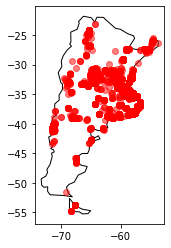

In [276]:
ax = geo_argentina.plot(color='white', edgecolor='black')
geo.plot(ax=ax, color='red', alpha= 0.5)
# plt.show()


In [277]:
from matplotlib.image import NonUniformImage
xedges = np.linspace(0,5000)
yedges = np.linspace(0,4000)
x = df.surface_covered_in_m2 * 10
y = df.price_usd_per_m2
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
# Histogram does not follow Cartesian convention (see Notes),
# therefore transpose H for visualization purposes.
H = H.T



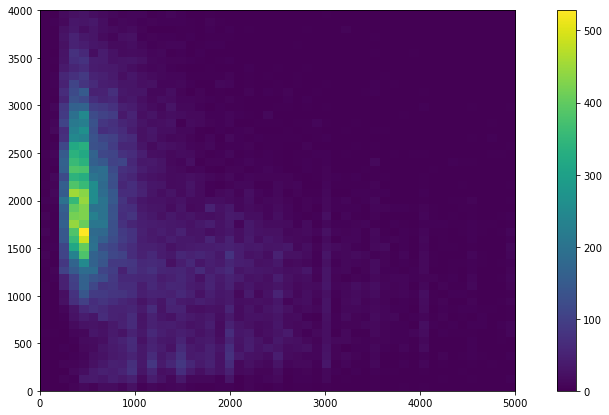

In [278]:
plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.show()        


In [279]:
(df.surface_covered_in_m2<1000).value_counts()

True     100841
False     20287
Name: surface_covered_in_m2, dtype: int64

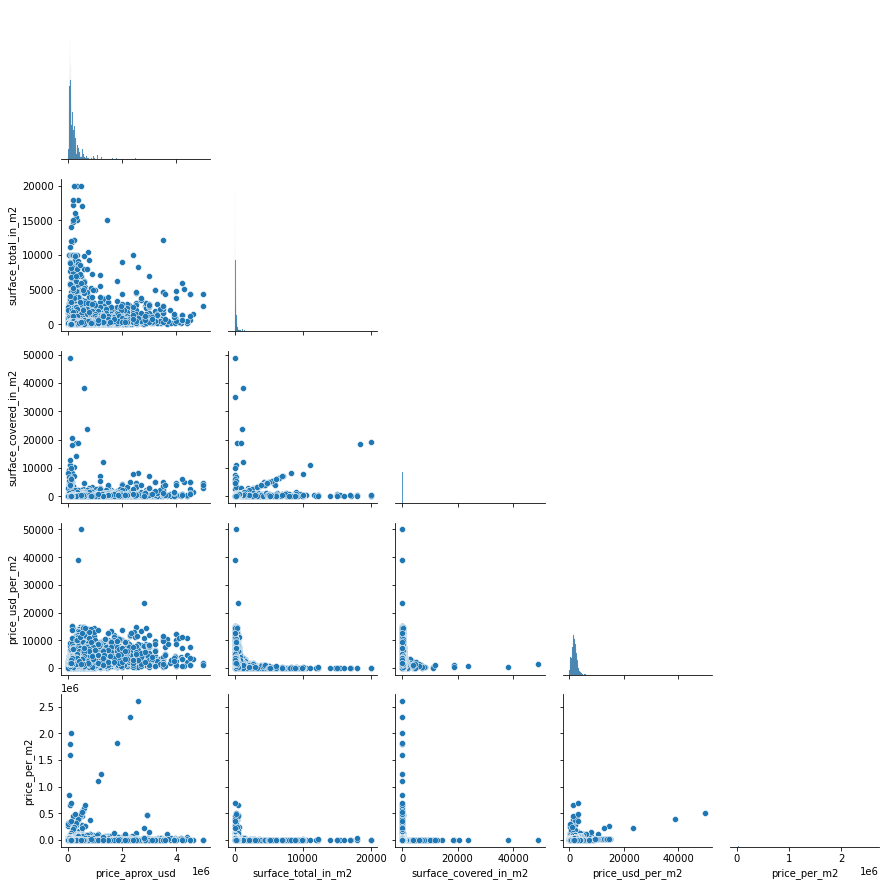

In [280]:
sns.pairplot(df,vars=['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2'],corner=True, dropna=True)



# Expresiones regulares

In [281]:
df.rooms[~df.rooms.isnull()]

13        1.0
14        1.0
16        4.0
17        3.0
19        3.0
         ... 
120203    2.0
120204    1.0
120205    5.0
120206    4.0
120207    1.0
Name: rooms, Length: 47363, dtype: float64

In [282]:
df.rooms.isnull().sum() *100 /len(df)

60.89838848160623

In [283]:
#cantidad de ambientes en descripción

patron = "(\d amb)"
regex = re.compile(patron)
description_series = df['description'].str.lower()
description_series = description_series.apply(lambda x: str(x))
resultado_ambientes = description_series.apply(lambda x: regex.findall(x))


In [284]:
resultado_ambientes

0         [2 amb]
1              []
2         [2 amb]
3         [3 amb]
4              []
           ...   
121215         []
121216         []
121217         []
121218    [2 amb]
121219         []
Name: description, Length: 121128, dtype: object

In [285]:
len(resultado_ambientes.sum())

46814

In [286]:
resultado_ambientes = resultado_ambientes.apply(lambda x: x[0] if len(x) != 0 else np.NaN )
resultado_ambientes = resultado_ambientes.str.split('amb')


In [287]:
resultado_ambientes = resultado_ambientes.apply(lambda x: x[0] if x is not np.NaN else np.NaN )

In [288]:
resultado_ambientes

0          2 
1         NaN
2          2 
3          3 
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218     2 
121219    NaN
Name: description, Length: 121128, dtype: object

In [289]:
df['ambientes'] = resultado_ambientes

In [290]:
df.ambientes

0          2 
1         NaN
2          2 
3          3 
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218     2 
121219    NaN
Name: ambientes, Length: 121128, dtype: object

In [291]:
df['rooms'] = df['rooms'].fillna(df['ambientes'])

In [292]:
df.rooms


0          2 
1         NaN
2          2 
3          3 
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218     2 
121219    NaN
Name: rooms, Length: 121128, dtype: object

In [293]:
df.rooms.isnull().sum()*100 /len(df)

45.29423419853378

In [294]:
#precio. No mejora en nada la cantidad de NAN
patron_precio = "(dls|usd|\$)\s?(\d{5,8})|(\d{5,8})\s?(dls|usd|\$)"
regex_p = re.compile(patron_precio)
description_series = df['description'].str.lower()
description_series = description_series.apply(lambda x: str(x))
resultado_precio = description_series.apply(lambda x: regex_p.findall(x))

In [295]:
resultado_precio.sample(15)

114772                     []
90705                      []
45356                      []
47107                      []
22960     [(usd, 275000, , )]
85579                      []
113962                     []
73315                      []
30344                      []
114051                     []
43463                      []
57072                      []
16006                      []
22515                      []
39328                      []
Name: description, dtype: object

In [296]:
resultado_precio.iloc[16522]

[('usd', '65000', '', '')]

In [297]:
[i for i in resultado_precio if i]

[[('usd', '300000', '', '')],
 [('usd', '50000', '', '')],
 [('usd', '72900', '', '')],
 [('usd', '150000', '', '')],
 [('usd', '120000', '', '')],
 [('usd', '125000', '', '')],
 [('usd', '165000', '', '')],
 [('usd', '135000', '', '')],
 [('usd', '95000', '', '')],
 [('usd', '80000', '', '')],
 [('usd', '430000', '', '')],
 [('usd', '95000', '', '')],
 [('usd', '181000', '', '')],
 [('usd', '143000', '', '')],
 [('usd', '120000', '', '')],
 [('usd', '160000', '', '')],
 [('usd', '460000', '', '')],
 [('usd', '140000', '', '')],
 [('usd', '78000', '', '')],
 [('usd', '130000', '', '')],
 [('usd', '150000', '', '')],
 [('usd', '360000', '', '')],
 [('usd', '465000', '', '')],
 [('usd', '385000', '', '')],
 [('usd', '72000', '', '')],
 [('usd', '120000', '', '')],
 [('usd', '200000', '', '')],
 [('usd', '150000', '', '')],
 [('usd', '450000', '', '')],
 [('usd', '75000', '', '')],
 [('usd', '40000', '', '')],
 [('usd', '99800', '', '')],
 [('usd', '375000', '', '')],
 [('usd', '54000', '

In [298]:
precio_2 = resultado_precio.apply(lambda x: x[0][1] if ((len(x) != 0)) else np.NaN )

In [299]:
precio_1 = resultado_precio.apply(lambda x: x[0][0] if ((len(x) != 0)) else np.NaN )
precio_1.iloc[16522]


'usd'

In [300]:
df['precio_relleno'] = precio_2
df['precio_relleno_mon'] = precio_1
df

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,geometry,ambientes,precio_relleno,precio_relleno_mon
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,2,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,POINT (-58.50884 -34.66182),2,NaN,NaN
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,POINT (-57.96433 -34.90388),NaN,NaN,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,POINT (-58.52298 -34.65226),2,NaN,NaN
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,3,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,POINT (-58.51642 -34.64780),3,NaN,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,1828.571429,1828.571429,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,POINT (-57.54945 -38.00263),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,NaN,NaN,NaN,870000.0,USD,...,93.0,9354.838710,9354.838710,NaN,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,POINT (nan nan),NaN,NaN,NaN
121216,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,NaN,498000.0,USD,...,360.0,1383.333333,1383.333333,NaN,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,POINT (nan nan),NaN,NaN,NaN
121217,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,131500.0,USD,...,39.0,2858.695652,3371.794872,NaN,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,POINT (-58.47560 -34.57064),NaN,NaN,NaN
121218,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,95900.0,USD,...,48.0,1997.916667,1997.916667,2,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,POINT (nan nan),2,NaN,NaN


In [301]:
#superficie en descripción
patron_sup = "((\d{1,3})\s?(m2)|(\d{1,3})\s?(metros))"
regex_sup = re.compile(patron_sup)
description_series = df['description'].str.lower()
description_series = description_series.apply(lambda x: str(x))
resultado_sup = description_series.apply(lambda x: regex_sup.findall(x))

In [302]:
resultado_sup.sample(20)

119937    [(55 m2, 55, m2, , ), (69 m2, 69, m2, , ), (17...
8215                                   [(45m2, 45, m2, , )]
71794                                  [(63m2, 63, m2, , )]
75200     [(989m2, 989, m2, , ), (837m2, 837, m2, , ), (...
42802                                                    []
115935                                                   []
90095        [(466 m2, 466, m2, , ), (400 m2, 400, m2, , )]
104786                                                   []
57411                                                    []
17488                                                    []
64508                                                    []
115056                                [(40 m2, 40, m2, , )]
78755                                 [(55 m2, 55, m2, , )]
87983                                [(100m2, 100, m2, , )]
101562                                                   []
105309                                                   []
35451                [(5 m2, 5, m2, , ),

In [303]:
df.description.iloc[32382]

'Planta baja, Living, cocina comedor diario, dos dormitorios, dos baños completos. En planta alta tres dormitorios y baño completo. Dos patios, quincho y cochera para dos autos.  Chalet a la calle con portones eléctrico dispuesto en dos plantas:En planta baja cuanta con amplio living y jardín de invierno, ventanales con persianas y vidrios blindados, cocina comedor con isla con mesada de granito y calefactor tiro balanceado, baño de servicio completo,  dormitorio con ventanales al patio, baño completo con jacuzzi y vestidor o segundo dormitorio.En planta alta hall de distribución con espacio para escritorio, baño completo con bañera, tres dormitorios y  bauleras.Quincho con parrilla a leña, horno, baño completo y lavadero.Todo el inmueble cuenta con calefacción por aire y excelentes materiales de construcción y diseño.'

In [304]:
sup1 = resultado_sup.apply(lambda x: x[0][1] if ((len(x) != 0)) else np.NaN )

In [305]:
(~sup1.isnull()).sum()

31614

# Datos geográficos


In [306]:
df.place_name.value_counts()

Córdoba                       9247
Rosario                       8501
Mar del Plata                 6532
Tigre                         3322
Nordelta                      3314
                              ... 
Paso de los Libres               1
Azara                            1
Coronel Du Graty                 1
Barrio Cerrado Los Troncos       1
Altos de Hudson I                1
Name: place_name, Length: 1060, dtype: int64

In [307]:
#Separamos en distintos niveles la ubicacion geográfica
df.place_with_parent_names.value_counts().head(10)

|Argentina|Santa Fe|Rosario|                              8501
|Argentina|Córdoba|Córdoba|                               6602
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|    6532
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|       3314
|Argentina|Capital Federal|Belgrano|                      2990
|Argentina|Capital Federal|Palermo|                       2884
|Argentina|Córdoba|                                       2645
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|                2357
|Argentina|Capital Federal|Caballito|                     2273
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|                1856
Name: place_with_parent_names, dtype: int64

In [308]:
split_geo = df.place_with_parent_names.str.split('|')

In [309]:
split_geo

0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa Atlántica, Ma...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa Atlántica, Ma...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121128, dtype: object

In [310]:
df['provincia'] = split_geo.apply(lambda x: x[2])
df['ciudad_barrio'] = split_geo.apply(lambda x: x[3])
df['sub_loc'] = split_geo.apply(lambda x: x[-2])

In [311]:
df.sub_loc.value_counts()

Córdoba                       9247
Rosario                       8501
Mar del Plata                 6532
Tigre                         3322
Nordelta                      3314
                              ... 
Arequito                         1
Coronel Du Graty                 1
Barrio Cerrado Los Troncos       1
Sierras Bayas                    1
Altos de Hudson I                1
Name: sub_loc, Length: 1061, dtype: int64

In [312]:
#agrego el dataset de geonames.org para completar datos faltantes en latitud y longitud
data = pd.read_csv('data\AR.txt', sep="\t", header=None)

In [313]:
data.set_axis(['geonames_id', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country', 'code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'dem', 'timezone', 'modification date'],axis=1, inplace=True)

In [314]:
data.sample(2)

,geonames_id,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country,code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,dem,timezone,modification date
44961,6956126,altos de balcarce,altos de balcarce,NaN,-24.78044,-65.41150,S,HTL,AR,NaN,17.0,66028.0,NaN,NaN,0,NaN,1193,America/Argentina/Salta,2016-01-30
14014,3836670,San Rafael,San Rafael,NaN,-31.85964,-65.54988,P,PPL,AR,NaN,5.0,14126.0,NaN,NaN,0,NaN,366,America/Argentina/Cordoba,2015-04-22


In [315]:
data.drop(['asciiname', 'alternatenames', 'feature_class', 'feature_code', 'country', 'code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'dem', 'timezone', 'modification date'],axis=1, inplace=True)

In [316]:
#chequeo que coincidan los registros de geoname entre los datasets
print(data[data['geonames_id'] == 3427455.0])
print(df[df['geonames_id'] == 3427455.0].sample(1))

     geonames_id              name  latitude  longitude
254      3427455  Villa del Parque -34.60057  -58.48871
       property_type        place_name  \
110874            PH  Villa del Parque   

                             place_with_parent_names       state_name  \
110874  |Argentina|Capital Federal|Villa del Parque|  Capital Federal   

        geonames_id                lat-lon        lat        lon     price  \
110874    3427455.0  -34.607621,-58.478873 -34.607621 -58.478873  104000.0   

       currency  ...  rooms  \
110874      USD  ...    3.0   

                                              description  \
110874  Corredor Responsable: Uno Bienes Raices SRL - ...   

                                                  title  \
110874  PH c/Amplia Terraza, Luminoso y No Apto Credito   

                           geometry  ambientes  precio_relleno  \
110874  POINT (-58.47887 -34.60762)         3              NaN   

       precio_relleno_mon        provincia     ciudad_barrio 

In [317]:
#Uno los dataset en la columna geonames
df = df.merge(data, how='left', on= 'geonames_id')
df.sample(2)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,name,latitude,longitude
117044,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.417365,-64.187802",-31.417365,-64.187802,1000000.0,ARS,...,POINT (-64.18780 -31.41737),NaN,NaN,NaN,Córdoba,Córdoba,Córdoba,Córdoba,-31.41350,-64.18105
19101,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3430863.0,"-38.0030611,-57.544193",-38.003061,-57.544193,155000.0,USD,...,POINT (-57.54419 -38.00306),4,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Mar del Plata,Mar del Plata,-38.00042,-57.55620


In [318]:

df['lat'] = df['lat'].fillna(df['latitude'])
df['lon'] = df['lon'].fillna(df['longitude'])


In [319]:
#pasamos de 42% a 7% de NaN
print(df['lat'].isnull().sum()*100 / len(df))
print(df['lon'].isnull().sum()*100 / len(df))

6.887755102040816
6.887755102040816


In [320]:
#eliminamos las columnas auxiliares
df.drop(['name', 'latitude', 'longitude'], axis =1, inplace=True)

In [321]:
df.isna().sum()*100/len(df)

property_type                  0.000000
place_name                     0.018988
place_with_parent_names        0.000000
state_name                     0.000000
geonames_id                   15.440691
lat-lon                       42.521135
lat                            6.887755
lon                            6.887755
price                         16.839211
currency                      16.839211
price_aprox_local_currency    16.839211
price_aprox_usd               16.839211
surface_total_in_m2           32.456575
surface_covered_in_m2         16.421472
price_usd_per_m2              43.478799
price_per_m2                  27.684763
rooms                         45.294234
description                    0.001651
title                          0.000000
geometry                       0.000000
ambientes                     69.020375
precio_relleno                96.217225
precio_relleno_mon            96.217225
provincia                      0.000000
ciudad_barrio                  0.000000


In [322]:
df.shape

(121128, 26)

In [323]:
c = df[df.lat.isnull()].sub_loc.unique()
c = pd.DataFrame(c)
c = c.set_axis(['name'], axis=1)
#asigno lat y long a cada uno
merge = c.merge(data, how= 'left', on= 'name')
merge

,name,geonames_id,latitude,longitude
0,Pilar,3429980.0,-34.45866,-58.91420
1,Pilar,3480748.0,-34.43750,-58.90556
2,Pilar,3841149.0,-31.67890,-63.87964
3,Pilar,3841150.0,-31.43937,-61.25884
4,Nordelta,7602820.0,-34.41427,-58.65171
...,...,...,...,...
417,Mayu Sumaj,NaN,NaN,NaN
418,Potrero de Garay,7733379.0,-31.77991,-64.54571
419,Mi Granja,12035914.0,-31.35609,-64.00297
420,El Nacional Club de Campo,NaN,NaN,NaN


In [324]:
merge = merge.rename(columns={'name' : 'sub_loc'})

In [325]:
merge = merge.drop_duplicates(subset=['sub_loc'])

In [326]:
merge.sub_loc.value_counts()

Pilar                           1
San Miguel de Ghiso             1
La Caleta                       1
Barrio Fortunato de La Plaza    1
Torreón                         1
                               ..
Desvío Arijón                   1
José Ingenieros                 1
Lisandro Olmos                  1
Monte Grande                    1
Altos de Hudson I               1
Name: sub_loc, Length: 225, dtype: int64

In [327]:
df = df.merge(merge, how= 'left', on= 'sub_loc')
df.sample(2)

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,geonames_id_y,latitude,longitude
72838,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Capital Federal,3427458.0,NaN,-34.600010,-58.447350,2250000.0,ARS,...,POINT (nan nan),2,NaN,NaN,Capital Federal,Villa Crespo,Villa Crespo,NaN,NaN,NaN
20813,apartment,Parque Chacabuco,|Argentina|Capital Federal|Parque Chacabuco|,Capital Federal,3430116.0,"-34.642519,-58.438692",-34.642519,-58.438692,253666.0,USD,...,POINT (-58.43869 -34.64252),3,NaN,NaN,Capital Federal,Parque Chacabuco,Parque Chacabuco,NaN,NaN,NaN


In [328]:
df['lat'] = df['lat'].fillna(df['latitude'])
df['lon'] = df['lon'].fillna(df['longitude'])
df['geonames_id_x'] = df['geonames_id_x'].fillna(df['geonames_id_y'])

In [329]:
df.shape

(121128, 29)

In [330]:
#pasamos de 7% a 1,6% de NaN
print(df['lat'].isnull().sum()*100 / len(df))
print(df['lon'].isnull().sum()*100 / len(df))

1.6610527706228122
1.6610527706228122


In [331]:
df[df['lat'].isnull()].ciudad_barrio.unique()

array(['San Isidro', 'Tigre', 'General San Martín', 'Berazategui',
       'Mar del Plata', 'Escobar', 'Ituzaingó', 'Lanús', 'La Matanza',
       'Palermo', 'Centro / Microcentro', 'Desamparados',
       'Costa Esmeralda', 'Pilar', 'José C Paz', 'La Plata',
       'Presidente Perón', 'Villa Ciudad Parque Los Reartes',
       'Tres de Febrero', 'Florencio Varela', 'Villa Santa Cruz del Lago',
       'Merlo', 'Lomas de Zamora', 'Campana', 'Brandsen', 'Moreno',
       'San Miguel', 'San Vicente', 'Malvinas Argentinas', 'Mar Chiquita',
       'General Rodríguez', 'Tribunales', '', 'Esteban Echeverría',
       'Mar Azul', 'Ezeiza', 'San Fernando', 'Catalinas',
       'Almirante Brown', 'Villa Parque Siquiman', 'La Serranita',
       'Mayu Sumaj'], dtype=object)

In [332]:
# df_merge = df_merge.merge(merge, how= 'left', left_on= 'ciudad_barrio', right_on='sub_loc')

In [333]:
#eliminamos las columnas auxiliares
df.drop(['geonames_id_y', 'latitude', 'longitude'], axis =1, inplace=True)

In [334]:
#Chequeamos que las coordenadas estén bien
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_argentina = world[world.name=='Argentina']
geo_limpio = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

<AxesSubplot:>

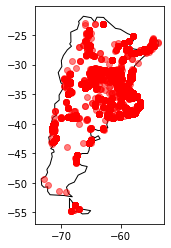

In [335]:
ax = geo_argentina.plot(color='white', edgecolor='black')
geo_limpio.plot(ax=ax, color='red', alpha= 0.5)
# plt.show()


In [336]:
df.isna().sum()*100/len(df)

property_type                  0.000000
place_name                     0.018988
place_with_parent_names        0.000000
state_name                     0.000000
geonames_id_x                  5.049204
lat-lon                       42.521135
lat                            1.661053
lon                            1.661053
price                         16.839211
currency                      16.839211
price_aprox_local_currency    16.839211
price_aprox_usd               16.839211
surface_total_in_m2           32.456575
surface_covered_in_m2         16.421472
price_usd_per_m2              43.478799
price_per_m2                  27.684763
rooms                         45.294234
description                    0.001651
title                          0.000000
geometry                       0.000000
ambientes                     69.020375
precio_relleno                96.217225
precio_relleno_mon            96.217225
provincia                      0.000000
ciudad_barrio                  0.000000


In [337]:
#Columna de distancia al obelisco
punto_obelisco = (-58.381555,-34.605425)
from shapely.geometry import Point
punto_obelisco_p = Point(-58.381555,-34.605425)


In [338]:
import geopy.distance
def distancia (row):
    lat_A, long_A = row['geometry'].x, row['geometry'].y
    try:
        return geopy.distance.geodesic((lat_A, long_A), punto_obelisco).meters
    except ValueError:
        return np.nan

df['distance_obelisco'] = geo_limpio.apply(distancia, axis=1)

In [339]:
df.head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,description,title,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,distance_obelisco
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,POINT (-58.50884 -34.66182),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,14555.078219
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,POINT (-57.96433 -34.90388),NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,49679.026046
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,POINT (-58.52298 -34.65226),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,15988.570648
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,POINT (-58.51642 -34.64780),3,NaN,NaN,Capital Federal,Liniers,Liniers,15224.874751
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,POINT (-57.54945 -38.00263),NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,221376.145262


In [340]:
len(df) - df.precio_relleno.isnull().sum()

4582

In [341]:
df['precio'] = df['price_aprox_usd'].fillna(df['precio_relleno'])

In [342]:
df.precio.isnull().sum() *100 / len(df)

16.826002245558417

In [343]:
(~df.precio_relleno.isnull()).sum()

4582

# Superficie

In [344]:
# Creamos y agregamos al df la columna 'superficie_m2', y en la misma la completamos con el cociente de las columnas 'price' y 'price_per_m2'

df['superficie_m2'] = df['price'] / df['price_per_m2']
df.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,distance_obelisco,precio,superficie_m2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,POINT (-58.50884 -34.66182),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,14555.078219,62000.0,40.0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,POINT (-57.96433 -34.90388),NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,49679.026046,150000.0,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,POINT (-58.52298 -34.65226),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,15988.570648,72000.0,55.0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,POINT (-58.51642 -34.64780),3,NaN,NaN,Capital Federal,Liniers,Liniers,15224.874751,95000.0,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,POINT (-57.54945 -38.00263),NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,221376.145262,64000.0,35.0


In [345]:
# Contabilizamos los NaN de la columna 'superficie_m2' (en cantidad)

df.superficie_m2.value_counts(dropna=False)

NaN       33534
40.0       2478
50.0       1909
100.0      1541
80.0       1325
          ...  
3556.0        1
513.0         1
3.0           1
458.0         1
195.0         1
Name: superficie_m2, Length: 2448, dtype: int64

In [346]:
# Contabilizamos los NaN de la columna 'superficie_m2' (en porcentaje)

df.superficie_m2.isna().sum()*100/len(df)

27.684763225678623

In [347]:
# Sustituimos valores nulos de la nueva columna 'superficie_m2' por valores de la columna 'surface_covered_in_m2'

df['surface_covered_in_m2'].fillna(df['superficie_m2'], inplace=True)
df.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,distance_obelisco,precio,superficie_m2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,POINT (-58.50884 -34.66182),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,14555.078219,62000.0,40.0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,POINT (-57.96433 -34.90388),NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,49679.026046,150000.0,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,POINT (-58.52298 -34.65226),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,15988.570648,72000.0,55.0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,POINT (-58.51642 -34.64780),3,NaN,NaN,Capital Federal,Liniers,Liniers,15224.874751,95000.0,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,POINT (-57.54945 -38.00263),NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,221376.145262,64000.0,35.0


In [348]:
# Contabilizamos los NaN por columna (en porcentaje)

df.isna().sum()*100/len(df)

property_type                  0.000000
place_name                     0.018988
place_with_parent_names        0.000000
state_name                     0.000000
geonames_id_x                  5.049204
lat-lon                       42.521135
lat                            1.661053
lon                            1.661053
price                         16.839211
currency                      16.839211
price_aprox_local_currency    16.839211
price_aprox_usd               16.839211
surface_total_in_m2           32.456575
surface_covered_in_m2         16.421472
price_usd_per_m2              43.478799
price_per_m2                  27.684763
rooms                         45.294234
description                    0.001651
title                          0.000000
geometry                       0.000000
ambientes                     69.020375
precio_relleno                96.217225
precio_relleno_mon            96.217225
provincia                      0.000000
ciudad_barrio                  0.000000


In [349]:
# Sustituimos valores nulos de la nueva columna 'superficie_m2' por valores de la columna 'surface_total_in_m2'

df['surface_covered_in_m2'].fillna(df['surface_total_in_m2'], inplace=True)
df.head()

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,geometry,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,distance_obelisco,precio,superficie_m2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,POINT (-58.50884 -34.66182),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,14555.078219,62000.0,40.0
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,POINT (-57.96433 -34.90388),NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,49679.026046,150000.0,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,POINT (-58.52298 -34.65226),2,NaN,NaN,Capital Federal,Mataderos,Mataderos,15988.570648,72000.0,55.0
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,POINT (-58.51642 -34.64780),3,NaN,NaN,Capital Federal,Liniers,Liniers,15224.874751,95000.0,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,POINT (-57.54945 -38.00263),NaN,NaN,NaN,Buenos Aires Costa Atlántica,Mar del Plata,Centro,221376.145262,64000.0,35.0


In [350]:
# Contabilizamos los NaN de la columna 'surface_covered_in_m2' (en cantidad)

df.surface_covered_in_m2.value_counts(dropna=False)

NaN        12359
40.0        2948
50.0        2417
45.0        2292
60.0        2026
           ...  
1815.0         1
3975.0         1
2164.0         1
18153.0        1
12000.0        1
Name: surface_covered_in_m2, Length: 1060, dtype: int64

In [351]:
# Contabilizamos los NaN por columna (en porcentaje)

df.isna().sum()*100/len(df)

property_type                  0.000000
place_name                     0.018988
place_with_parent_names        0.000000
state_name                     0.000000
geonames_id_x                  5.049204
lat-lon                       42.521135
lat                            1.661053
lon                            1.661053
price                         16.839211
currency                      16.839211
price_aprox_local_currency    16.839211
price_aprox_usd               16.839211
surface_total_in_m2           32.456575
surface_covered_in_m2         10.203256
price_usd_per_m2              43.478799
price_per_m2                  27.684763
rooms                         45.294234
description                    0.001651
title                          0.000000
geometry                       0.000000
ambientes                     69.020375
precio_relleno                96.217225
precio_relleno_mon            96.217225
provincia                      0.000000
ciudad_barrio                  0.000000


In [352]:
# Pasamos de 16% (surface_total_in_m2 & surface_covered_in_m2) al 10% (surface_covered_in_m2) de NaN

In [353]:
#Rellenamos lo que resta con los resultados del regex
df['sup1'] = sup1
df['surface_covered_in_m2'].fillna(df['sup1'], inplace=True)

In [354]:
df.surface_covered_in_m2 = df.surface_covered_in_m2.apply(pd.to_numeric)
df.drop(df[df.surface_covered_in_m2 > 10000].index, inplace=True)


In [355]:
df.surface_covered_in_m2.isna().sum()*100/len(df)

7.970637535402578

# Precio

In [356]:
# Contabilizamos los tipos de valores de la columna 'currency'

df.currency.value_counts()

USD    87504
ARS    13210
PEN        2
Name: currency, dtype: int64

In [357]:
# Quitamos monedas que no utilizaremos, y que tienen ínfimos registros

df.drop(df[df.currency=='PEN'].index, inplace=True)
df.drop(df[df.currency=='UYU'].index, inplace=True)

In [358]:
# Controlamos que se hayan eliminado las monedas 'PEN' y 'UYU'

df.currency.value_counts()

USD    87504
ARS    13210
Name: currency, dtype: int64

In [359]:
# Mostramos los tres tipos de precios y sus cantidad de NaN
# Es posible que las columnas salgan de calculos entre ellas

df[['price', 'price_aprox_local_currency', 'price_aprox_usd']].isna().sum()

price                         20391
price_aprox_local_currency    20391
price_aprox_usd               20391
dtype: int64

In [360]:
# Calculamos la cotización del dólar de acuerdo a las Series 'price_aprox_local_currency' y 'price_aprox_usd'

cotizacion = df.price_aprox_local_currency / df.price_aprox_usd
cotizacion.median()

17.6445

In [361]:
df[df.price_aprox_usd.isna()].sample(3)

,property_type,place_name,place_with_parent_names,state_name,geonames_id_x,lat-lon,lat,lon,price,currency,...,ambientes,precio_relleno,precio_relleno_mon,provincia,ciudad_barrio,sub_loc,distance_obelisco,precio,superficie_m2,sup1
29905,PH,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,NaN,-31.413500,-64.181050,NaN,NaN,...,NaN,NaN,NaN,Córdoba,Córdoba,Córdoba,6.683323e+05,NaN,NaN,NaN
79607,apartment,Mendoza,|Argentina|Mendoza|,Mendoza,3844419.0,NaN,-34.500000,-68.500000,NaN,NaN,...,NaN,NaN,NaN,Mendoza,,Mendoza,1.127883e+06,NaN,NaN,841
57221,house,Manuel B Gonnet,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Man...,Bs.As. G.B.A. Zona Sur,NaN,"-34.874788,-57.998157",-34.874788,-57.998157,NaN,NaN,...,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata,Manuel B Gonnet,4.554761e+04,NaN,NaN,NaN


In [362]:
df.rename(columns={'geonames_id_x':'geonames_id'}, inplace=True)

In [363]:
df_geo_m2 = df.groupby('geonames_id')['price_usd_per_m2'].median()
df_geo_m2.reset_index()

,geonames_id,price_usd_per_m2
0,3427208.0,156.250000
1,3427212.0,20.555556
2,3427326.0,1540.000000
3,3427354.0,1006.756757
4,3427366.0,754.364295
...,...,...
722,11961677.0,931.835491
723,12035914.0,NaN
724,12035938.0,226.506593
725,12035960.0,137.917638


In [364]:
df = df.merge(df_geo_m2, how='left', on= 'geonames_id')

In [365]:
df['precio_m2'] = df['price_usd_per_m2_x'].fillna(df['price_usd_per_m2_y'])

In [366]:
#Imputacion del precio a partir del precio por m2 calculado por barrio

In [367]:
df['surface_covered_in_m2'].fillna(0, inplace=True)
df['precio_m2'].fillna(0, inplace=True)

In [368]:
# Convertimos los datos de las Series indicadas en tipo numéricos 

df[['surface_covered_in_m2', 'precio_m2']] = df[['surface_covered_in_m2', 'precio_m2']].apply(pd.to_numeric)

In [369]:
# df.precio_imp = df.apply(lambda x: (x['superficie_m2'] * x['precio_m2']) if ((x['superficie_m2'] is not np.NaN) & (x['precio_m2'] is not np.NaN)) else np.NaN, axis =1)
# df.precio_imp = df['superficie_m2'] * df['precio_m2']
df['precio_imp'] = df['surface_covered_in_m2'] * df['precio_m2']

In [370]:
df.price_aprox_usd = df.price_aprox_usd.fillna(df.precio_imp)             

In [371]:
print((df.price_aprox_usd==0).sum())
df['price_aprox_usd'] = np.where((df.price_aprox_usd == 0), np.NaN, df['price_aprox_usd'])

4912


In [372]:
df.isna().sum()*100/len(df)

property_type                  0.000000
place_name                     0.018992
place_with_parent_names        0.000000
state_name                     0.000000
geonames_id                    5.048512
lat-lon                       42.520127
lat                            1.659717
lon                            1.659717
price                         16.837455
currency                      16.837455
price_aprox_local_currency    16.837455
price_aprox_usd                4.055984
surface_total_in_m2           32.456133
surface_covered_in_m2          0.000000
price_usd_per_m2_x            43.476322
price_per_m2                  27.681764
rooms                         45.291276
description                    0.001651
title                          0.000000
geometry                       0.000000
ambientes                     69.015317
precio_relleno                96.216506
precio_relleno_mon            96.216506
provincia                      0.000000
ciudad_barrio                  0.000000


<AxesSubplot:xlabel='price_aprox_usd', ylabel='surface_covered_in_m2'>

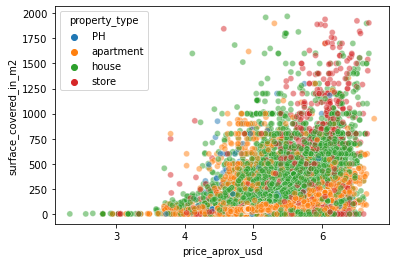

In [373]:
# Quizas hacer un tasador aparte para store?

sns.scatterplot(x=((df[df.surface_covered_in_m2<2000].price_aprox_usd).apply(custom_log10)), y=(df[df.surface_covered_in_m2<2000].surface_covered_in_m2), hue=df.property_type, alpha=0.5)
#plt.xlabel('log (Price USD)')
#plt.ylabel('superficie (m2)')

(0.0, 500.0)

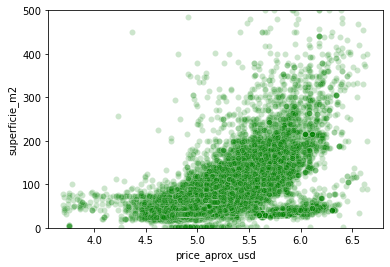

In [389]:

sns.scatterplot(x=((df[(df.superficie_m2<2000) & (df.property_type == 'apartment')].price_aprox_usd).apply(custom_log10)), y=(df[(df.superficie_m2<2000) & (df.property_type == 'apartment')].superficie_m2), color= 'green', alpha=0.2)
plt.ylim(0,500)

In [392]:
df['segmento'] = pd.qcut(df.precio_m2, 3, labels=  ['bajo', 'medio', 'alto'])

<AxesSubplot:xlabel='price_aprox_usd', ylabel='superficie_m2'>

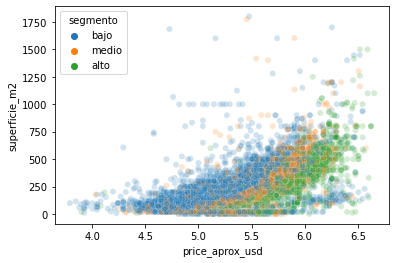

In [397]:
sns.scatterplot(x=((df[(df.superficie_m2<2000) & (df.property_type == 'house')].price_aprox_usd).apply(custom_log10)), y=(df[(df.superficie_m2<2000) & (df.property_type == 'house')].superficie_m2), alpha=0.2, hue=df['segmento'])

<AxesSubplot:xlabel='price_aprox_usd', ylabel='superficie_m2'>

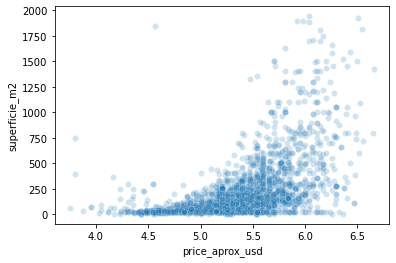

In [386]:
sns.scatterplot(x=((df[(df.superficie_m2<2000) & (df.property_type == 'store')].price_aprox_usd).apply(custom_log10)), y=(df[(df.superficie_m2<2000) & (df.property_type == 'store')].superficie_m2),palette= 'orange', alpha=0.2)


<AxesSubplot:>

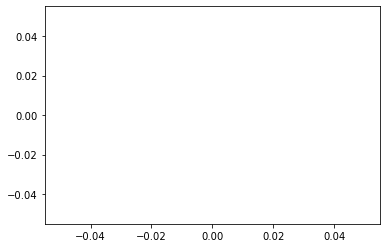

In [378]:
sns.scatterplot(x=((df[(df.superficie_m2<2000) & (df.property_type == 'store')].price_aprox_usd).apply(custom_log10)), y=(df[(df.superficie_m2<2000) & (df.property_type == 'apartment')].superficie_m2),palette= 'orange', alpha=0.2)

In [145]:
# Calculamos la mediana de cada Serie referida al precio

table_price = pd.pivot_table(df,index=['property_type'], values=['price', 'price_aprox_local_currency', 'price_aprox_usd'], columns=['currency'], aggfunc=[len])
table_price.head(5)

len                                                           \
               price        price_aprox_local_currency        price_aprox_usd   
currency         ARS    USD                        ARS    USD             ARS   
property_type                                                                   
PH               199   5020                        199   5020             199   
apartment      10348  49245                      10348  49245           10348   
house           2393  30269                       2393  30269            2393   
store            270   2970                        270   2970             270   

                      
                      
currency         USD  
property_type         
PH              5020  
apartment      49245  
house          30269  
store           2970

In [146]:
# Contabilizamos los NaN de la columna 'price_aprox_usd' (en cantidad)

df.price_aprox_usd.value_counts(dropna=False)

NaN              4912
120000.000000    1693
130000.000000    1455
150000.000000    1414
110000.000000    1331
                 ... 
153998.710000       1
613527.365000       1
439727.364185       1
217894.736842       1
282900.000000       1
Name: price_aprox_usd, Length: 15789, dtype: int64

In [147]:
# Contabilizamos los NaN de la columna 'price_aprox_usd' (en porcentaje)

df.price_aprox_usd.isna().sum()*100/len(df)

4.055984476280913

In [148]:
df.rename(columns={'price_usd_per_m2_x' : 'price_usd_per_m2'}, inplace=True)

In [149]:
## INICIO 

In [150]:
# Comprobamos que la Serie 'price_usd_per_m2' tiene precios en ambas monedas

table_price = pd.pivot_table(df,index=['price_usd_per_m2'], values=['price'], columns=['currency'], aggfunc=[len])
table_price.sample(5)

len     
                 price     
currency           ARS  USD
price_usd_per_m2           
2378.378378        NaN  6.0
2247.696429        NaN  1.0
2513.888889        NaN  2.0
2119.273333        NaN  1.0
2023.255814        NaN  4.0

In [151]:
# Comprobamos que la Serie 'price_per_m2' tiene precios en ambas monedas

table_price = pd.pivot_table(df,index=['price_per_m2'], values=['price'], columns=['currency'], aggfunc=[len])
table_price.sample(5)

len     
             price     
currency       ARS  USD
price_per_m2           
7053.254438    NaN  1.0
1501.976285    NaN  2.0
54090.909091   1.0  NaN
1477.516060    NaN  1.0
2023.684211    NaN  1.0

# Estadística

In [152]:
# Calculamos la mediana de cada zona

median_price_grouped_place = df.groupby(['place_name'])['price'].median().reset_index()
median_price_grouped_place.head()

,place_name,price
0,Country Maschwitz Club,320000.0
1,los alamos,81600.0
2,9 de Abril,300000.0
3,Abasto,135000.0
4,Abril Club de Campo,780000.0


In [153]:
# Calculamos la mediana de cada zona

median_priceM2_grouped_place = df.groupby(['place_name'])['price'].median().reset_index()
median_priceM2_grouped_place.head()

,place_name,price
0,Country Maschwitz Club,320000.0
1,los alamos,81600.0
2,9 de Abril,300000.0
3,Abasto,135000.0
4,Abril Club de Campo,780000.0


In [154]:
# Calculamos distintas medidas de estadística de cada zona

median_price_grouped_place = df.groupby(['place_name'])['price'].describe().reset_index()
median_price_grouped_place.head()

,place_name,count,mean,std,min,25%,50%,75%,max
0,Country Maschwitz Club,3.0,311666.666667,112731.243821,195000.0,257500.0,320000.0,370000.0,420000.0
1,los alamos,1.0,81600.000000,NaN,81600.0,81600.0,81600.0,81600.0,81600.0
2,9 de Abril,3.0,270000.000000,147309.198627,110000.0,205000.0,300000.0,350000.0,400000.0
3,Abasto,109.0,175877.201835,192932.251335,38000.0,91000.0,135000.0,167000.0,1564000.0
4,Abril Club de Campo,6.0,736666.666667,236361.305350,390000.0,637500.0,780000.0,780000.0,1100000.0


In [155]:
# Comprobamos que la mediana esté correctamente calculada

df[df.place_name == '9 de Abril']

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,provincia,ciudad_barrio,sub_loc,distance_obelisco,precio,superficie_m2,sup1,price_usd_per_m2_y,precio_m2,precio_imp
25528,house,9 de Abril,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...,Bs.As. G.B.A. Zona Sur,12035960.0,"-34.7562579,-58.4982883",-34.756258,-58.498288,110000.0,USD,...,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,9 de Abril,15705.714495,110000.0,160.0,NaN,137.917638,94.017094,15042.735043
78433,store,9 de Abril,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...,Bs.As. G.B.A. Zona Sur,12035960.0,NaN,-34.760410,-58.481610,300000.0,USD,...,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,9 de Abril,14359.007328,300000.0,400.0,NaN,137.917638,137.917638,55167.055167
84748,store,9 de Abril,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Eche...,Bs.As. G.B.A. Zona Sur,12035960.0,NaN,-34.760410,-58.481610,400000.0,USD,...,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,9 de Abril,14359.007328,400000.0,2200.0,NaN,137.917638,181.818182,400000.000000


# Dataset final


In [156]:
df.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms',
       'description', 'title', 'geometry', 'ambientes', 'precio_relleno',
       'precio_relleno_mon', 'provincia', 'ciudad_barrio', 'sub_loc',
       'distance_obelisco', 'precio', 'superficie_m2', 'sup1',
       'price_usd_per_m2_y', 'precio_m2', 'precio_imp'],
      dtype='object')

In [157]:
#no dropear precio por metro 2
df.drop([ 'place_name', 'place_with_parent_names', 'state_name','geometry',
        'lat-lon', 'price', 'currency','price_aprox_local_currency','superficie_m2',  'price_per_m2', 'rooms',
       'description', 'title',  'ambientes', 'precio_relleno','precio_relleno_mon', 'provincia', 
       'surface_total_in_m2' , 'sup1','price_usd_per_m2_y', 'price_usd_per_m2', 'precio_imp', 'precio', 'geonames_id'], axis=1, inplace=True)

In [158]:
df.shape

(121105, 9)

In [159]:
df.isnull().sum()*100/len(df)

property_type            0.000000
lat                      1.659717
lon                      1.659717
price_aprox_usd          4.055984
surface_covered_in_m2    0.000000
ciudad_barrio            0.000000
sub_loc                  0.000000
distance_obelisco        1.659717
precio_m2                0.000000
dtype: float64

In [160]:
df.dropna(inplace=True)

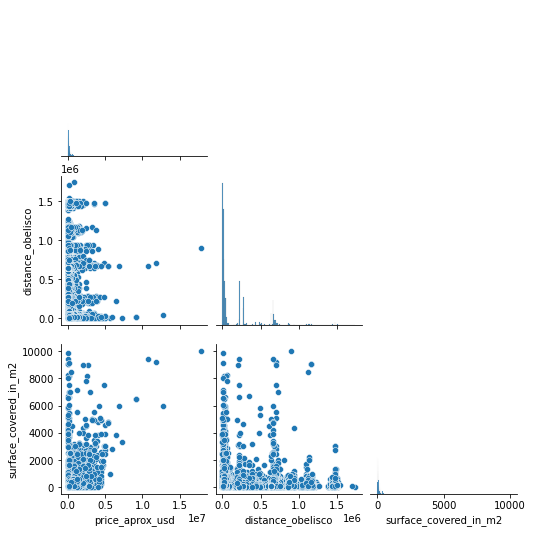

In [161]:
sns.pairplot(df,vars=['price_aprox_usd', 'distance_obelisco', 'surface_covered_in_m2'],corner=True, dropna=True)

In [162]:
df.shape

(114374, 9)

In [163]:
len(df)*100/121220

94.35241709288896